<a href="https://colab.research.google.com/github/Daniel-Oduntan/FDSfE_DOduntan/blob/main/10-25-2022/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd

In [98]:
bank = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")

In [99]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1037,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
1038,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
1039,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
1040,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
1041,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes


In [100]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,blue-collar,married,secondary,no,1663,yes,no,cellular,13,apr,217,3,327,1,failure,no
1,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no
2,34,blue-collar,married,secondary,no,360,yes,no,telephone,19,nov,46,1,182,2,failure,no
3,60,admin.,married,secondary,no,1025,no,no,cellular,6,aug,388,8,-1,0,unknown,no
4,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no


In [101]:
bank['y']

0        no
1        no
2        no
3        no
4        no
       ... 
1037    yes
1038    yes
1039    yes
1040    yes
1041    yes
Name: y, Length: 1042, dtype: object

In [102]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [103]:
bank['y']== 'yes'

0       False
1       False
2       False
3       False
4       False
        ...  
1037     True
1038     True
1039     True
1040     True
1041     True
Name: y, Length: 1042, dtype: bool

In [104]:
(bank['y']== 'yes').astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1037    1
1038    1
1039    1
1040    1
1041    1
Name: y, Length: 1042, dtype: int64

In [105]:
bank['target']=(bank['y']== 'yes').astype(int)

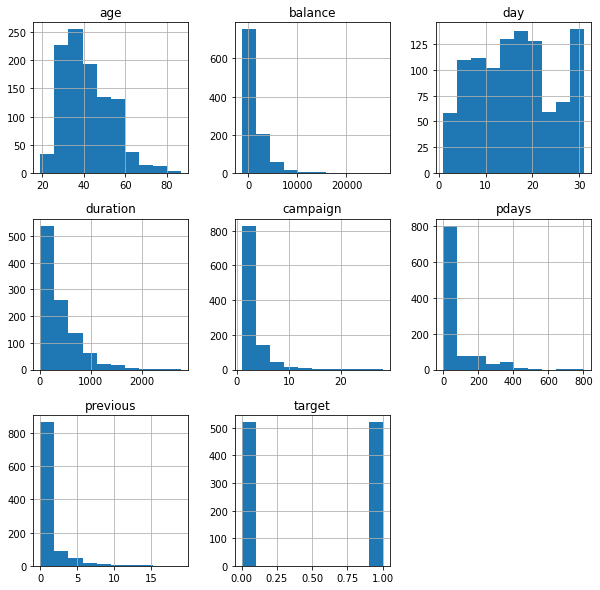

In [106]:
bank.hist(figsize=(10,10));

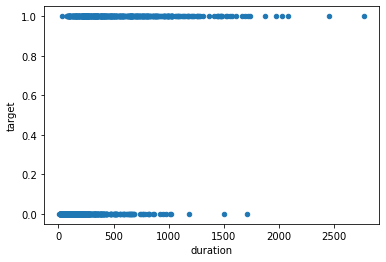

In [107]:
bank.plot('duration', 'target', kind='scatter')

In [108]:
features=bank['duration']
target=bank['target']


In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logreg = LogisticRegression()

In [113]:
reshapefeatures=features.values.reshape(-1,1)

In [114]:
reshapefeatures.shape

(1042, 1)

In [115]:
logreg.fit(reshapefeatures,target) 

LogisticRegression()

In [116]:
logreg.intercept_

array([-1.54905868])

In [118]:
logreg.coef_

array([[0.00443281]])

In [117]:
import pylab as plt
import numpy as np

AttributeError: ignored

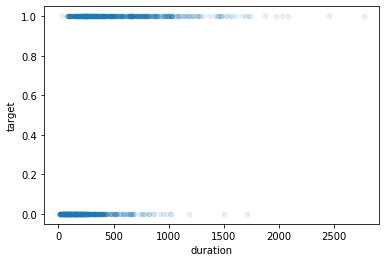

In [121]:
ax=bank.plot('duration', 'target', kind='scatter', alpha=0.1)
x = np.arrange(0, 3000, 100)
z=logreg.coef_[0]*x + logreg.intercept_
f=1/(1+np.exp(-z))
ax.plot(x, f, label = 'model')
ax.legend();


In [ ]:
logreg.predict(features)